## 

## Introduction 
* In the ever-evolving landscape of business and commerce, understanding customer behavior is paramount for strategic decision-making. 
* One effective way to gain insights into customer purchasing patterns is through predictive modeling. This project endeavors to employ a decision tree classifier to forecast whether a customer will make a purchase, leveraging a rich dataset encompassing demographic information and behavioral data. 
* By doing so, we aim to equip businesses with a predictive tool that can enhance their ability to tailor marketing strategies and optimize customer engagement.

## Project Overview 
* The project centers around the creation and utilization of a decision tree classifier, a powerful machine learning algorithm, to predict customer purchasing behavior. Leveraging a diverse dataset that incorporates demographic details and behavioral data, the aim is to develop a robust model capable of making accurate predictions regarding a customer's likelihood to purchase a product or service. 
* The project workflow encompasses data exploration, preprocessing, model training, and evaluation to ensure the classifier's efficacy. The ultimate goal is to provide businesses with a valuable tool for customer relationship management and targeted marketing.

### Problem Statement 
* Despite the increasing availability of data, accurately predicting customer purchase behavior remains a complex challenge. The aim of this project is to address this challenge by developing a decision tree classifier capable of discerning patterns within demographic and behavioral data to forecast purchasing decisions. 
* Key issues involve identifying relevant features, mitigating potential biases in the dataset, and optimizing the decision tree model for both accuracy and interpretability. By tackling these challenges, we seek to empower businesses with a valuable tool for enhancing customer targeting and optimizing marketing initiatives.

## Import Libraries 
* These are the required libraries needed to read data 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

from sklearn.preprocessing import LabelEncoder

#### Load Data 

In [2]:
# Load the dataset into a DataFrame
bank_data = pd.read_csv(r'C:\Users\wanji\Desktop\ML Projects\bank+marketing\bank\bank-full.csv', sep=';')
bank_data

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
0        unknown    5   may       261         1     -1         0  unknown   no  
1        unknown    5   may       151         1     -1         0  unknown   no  
2        unknown    5   may        76         1     -1         0  unknown   no  
3        unknown    5   may        92         1     -1         0  unknown   no  
4        unknown    5   may       198         1     -1         0  unknown   no  
...          ...  ...   ...       ...       ...    ...       ...      ...  ...  
45206   cellular   17   nov       977         3     -1         0  unknown  yes  
45207   cellular   17   nov       456         2     -1         0  unknown  yes  
45208   cellular   17   nov      1127         5    184         3  success  yes  
45209  telephone   17   nov       508         4     -1         0  unknown   no  
45210   cellular   17   nov       361         2    188        11    other   no  

[45211 rows x 17 columns]

In [3]:
bank_data.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [4]:
bank_data.tail()

age           job   marital  education default  balance housing loan  \
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
45206   cellular   17   nov       977         3     -1         0  unknown  yes  
45207   cellular   17   nov       456         2     -1         0  unknown  yes  
45208   cellular   17   nov      1127         5    184         3  success  yes  
45209  telephone   17   nov       508         4     -1         0  unknown   no  
45210   cellular   17   nov       361         2    188        11    other   no

## Data Understanding
This involves:
* Shape
* Columns, column names
* Column Datatypes
    


In [5]:
file_path = r'C:\Users\wanji\Desktop\ML Projects\bank+marketing\bank\bank-full.csv'
bank_data= pd.read_csv(file_path, sep=';')
#Function to determine the shape, column names 
def analyze_dataset(dataset):
    shape = dataset.shape
    column_names = dataset.columns
    columns = dataset.values.tolist()
    return shape, column_names,columns


In [6]:
shape, column_names,columns= analyze_dataset(bank_data)
print("Shape:", shape)
print("Column Names:", column_names)
print("Columns:",columns)


Shape: (45211, 17)
Column Names: Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')
Columns: [[58, 'management', 'married', 'tertiary', 'no', 2143, 'yes', 'no', 'unknown', 5, 'may', 261, 1, -1, 0, 'unknown', 'no'], [44, 'technician', 'single', 'secondary', 'no', 29, 'yes', 'no', 'unknown', 5, 'may', 151, 1, -1, 0, 'unknown', 'no'], [33, 'entrepreneur', 'married', 'secondary', 'no', 2, 'yes', 'yes', 'unknown', 5, 'may', 76, 1, -1, 0, 'unknown', 'no'], [47, 'blue-collar', 'married', 'unknown', 'no', 1506, 'yes', 'no', 'unknown', 5, 'may', 92, 1, -1, 0, 'unknown', 'no'], [33, 'unknown', 'single', 'unknown', 'no', 1, 'no', 'no', 'unknown', 5, 'may', 198, 1, -1, 0, 'unknown', 'no'], [35, 'management', 'married', 'tertiary', 'no', 231, 'yes', 'no', 'unknown', 5, 'may', 139, 1, -1, 0, 'unknown', 'no'], [28, 'management', 'single', 'te

In [7]:

# Determine the Column Datatypes
file_path = r'C:\Users\wanji\Desktop\ML Projects\bank+marketing\bank\bank-full.csv'
bank_data = pd.read_csv(file_path, sep=';')

def column_data_type(dataset):
    column_type = dataset.dtypes
    return column_type

# Call the function with the DataFrame 'bank_data'
data_types = column_data_type(bank_data)
print("Data Types:", data_types)


Data Types: age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


In [8]:
# To know the Statistics 
def get_dataset_statistics(dataset):
    statistics = dataset.describe(include ='all')
    return statistics

# Call the function with the DataFrame 'bank_data'
get_statistics = get_dataset_statistics(bank_data)
get_statistics

age          job  marital  education default        balance  \
count   45211.000000        45211    45211      45211   45211   45211.000000   
unique           NaN           12        3          4       2            NaN   
top              NaN  blue-collar  married  secondary      no            NaN   
freq             NaN         9732    27214      23202   44396            NaN   
mean       40.936210          NaN      NaN        NaN     NaN    1362.272058   
std        10.618762          NaN      NaN        NaN     NaN    3044.765829   
min        18.000000          NaN      NaN        NaN     NaN   -8019.000000   
25%        33.000000          NaN      NaN        NaN     NaN      72.000000   
50%        39.000000          NaN      NaN        NaN     NaN     448.000000   
75%        48.000000          NaN      NaN        NaN     NaN    1428.000000   
max        95.000000          NaN      NaN        NaN     NaN  102127.000000   

       housing   loan   contact           day  month      duration  \
count    45211  45211     45211  45211.000000  45211  45211.000000   
unique       2      2         3           NaN     12           NaN   
top        yes     no  cellular           NaN    may           NaN   
freq     25130  37967     29285           NaN  13766           NaN   
mean       NaN    NaN       NaN     15.806419    NaN    258.163080   
std        NaN    NaN       NaN      8.322476    NaN    257.527812   
min        NaN    NaN       NaN      1.000000    NaN      0.000000   
25%        NaN    NaN       NaN      8.000000    NaN    103.000000   
50%        NaN    NaN       NaN     16.000000    NaN    180.000000   
75%        NaN    NaN       NaN     21.000000    NaN    319.000000   
max        NaN    NaN       NaN     31.000000    NaN   4918.000000   

            campaign         pdays      previous poutcome      y  
count   45211.000000  45211.000000  45211.000000    45211  45211  
unique           NaN           NaN           NaN        4      2  
top              NaN           NaN           NaN  unknown     no  
freq             NaN           NaN           NaN    36959  39922  
mean        2.763841     40.197828      0.580323      NaN    NaN  
std         3.098021    100.128746      2.303441      NaN    NaN  
min         1.000000     -1.000000      0.000000      NaN    NaN  
25%         1.000000     -1.000000      0.000000      NaN    NaN  
50%         2.000000     -1.000000      0.000000      NaN    NaN  
75%         3.000000     -1.000000      0.000000      NaN    NaN  
max        63.000000    871.000000    275.000000      NaN    NaN

### Data Cleaning

In [9]:

# Function to check for duplicates
def check_duplicates(dataset):
    duplicates = dataset.duplicated().sum()
    return duplicates
# Call the function
check_duplicates_result = check_duplicates(bank_data)
check_duplicates_result


0

In [10]:
# Check for missing values
def check_missing_values(dataset):
    missing_values = dataset.isnull().sum()
    return missing_values

# Call the function 
missing_values_result = check_missing_values(bank_data)
missing_values_result

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [11]:
# Drop rows with missing values in the 'contact' column
bank_data.dropna(subset=['contact'], inplace=True)

# Display the modified DataFrame
print(bank_data.head())


   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


* From the above there are no duplicates nor missing values, which shows that the dataset is clean and comprehensive analysis/EDA can be done 

## EDA
* In depth understanding of the dataset

* `Y` target distribution

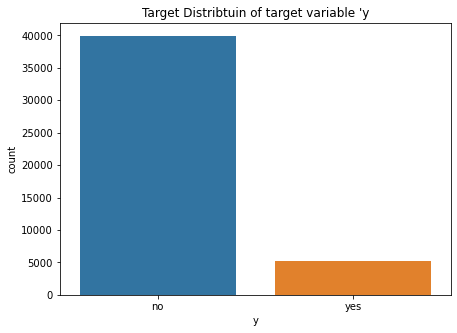

In [12]:
# Showing the target distribution of 'Y'
plt.figure(figsize=(7,5))
sns.countplot(x='y', data=bank_data)
plt.title("Target Distribtuin of target variable 'y")
plt.show()

*  The distribution shows the high count of 'no' as the general outcome than the 'yes' 
* The y in this case represents the general/rather total outcome of the 'poutcome'

### Numerical Features 

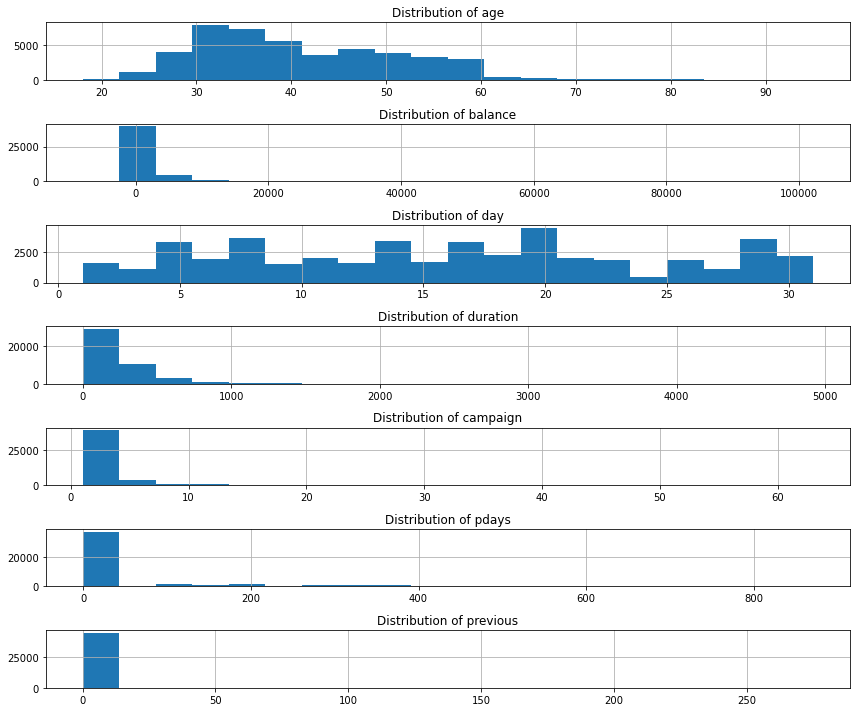

In [13]:
numerical_features = bank_data.select_dtypes(include=['int64', 'float64']).columns
fig, axes = plt.subplots(nrows=len(numerical_features), ncols=1, figsize=(12, 10))

for i, feature in enumerate(numerical_features):
    bank_data[feature].hist(bins=20, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()


### Categorical Features 

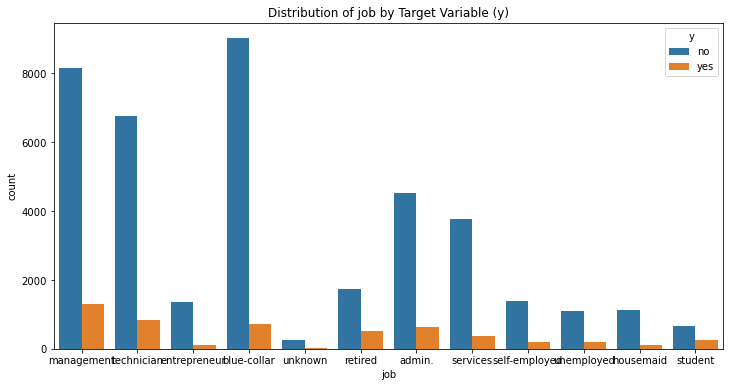

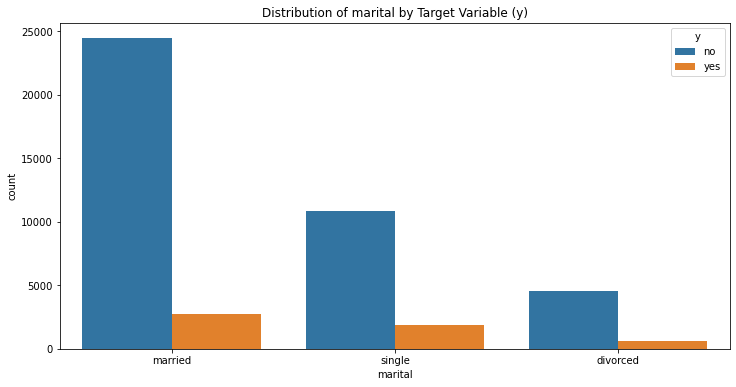

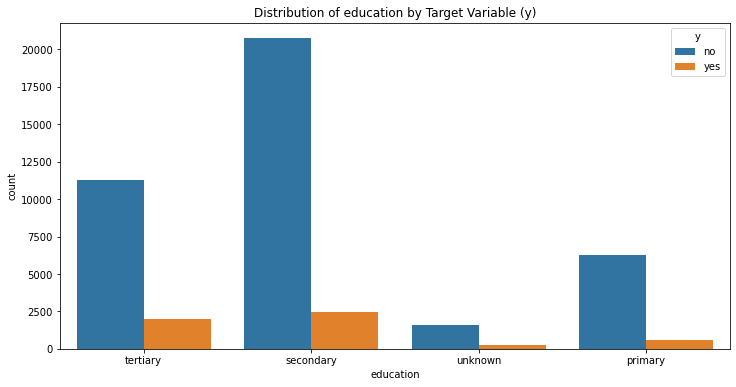

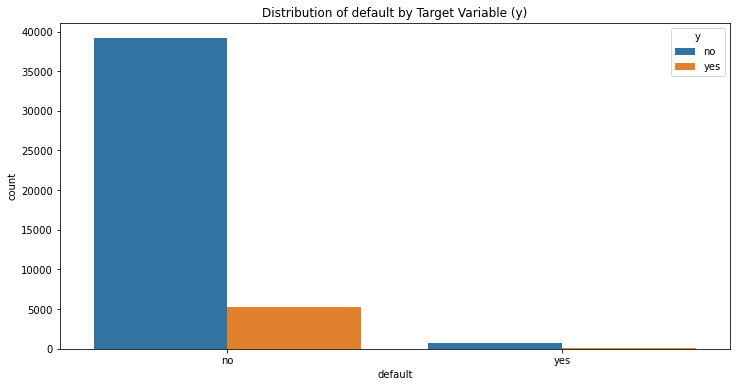

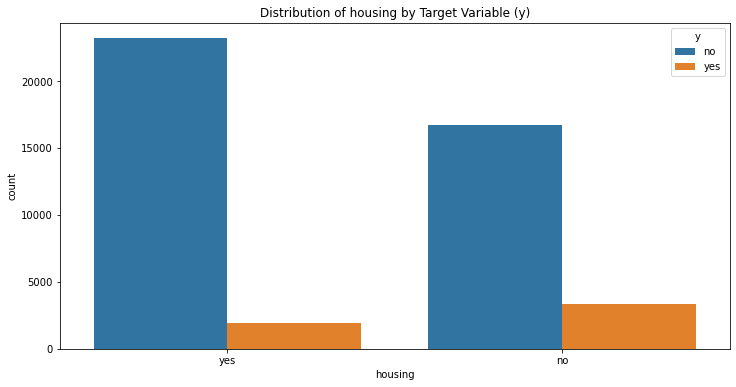

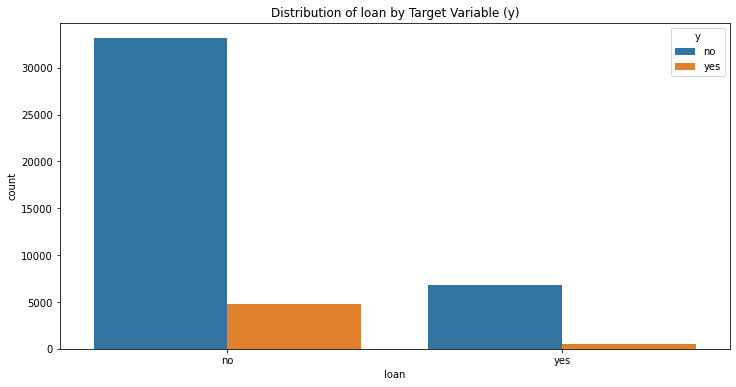

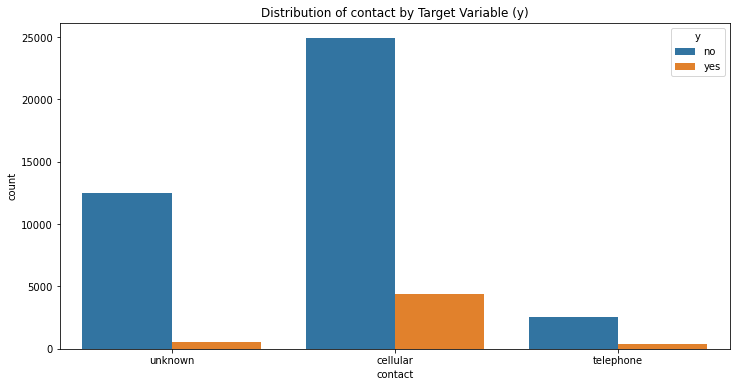

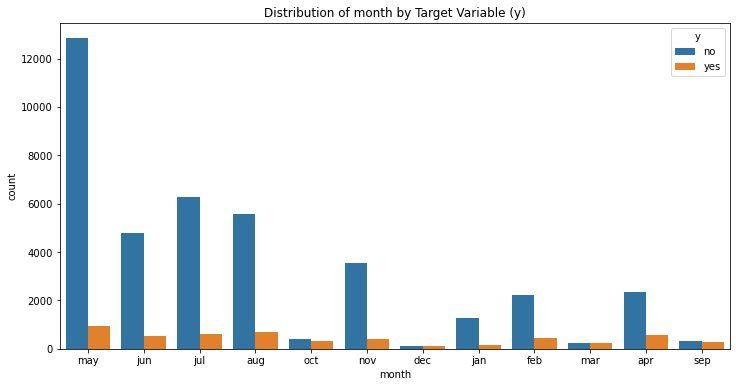

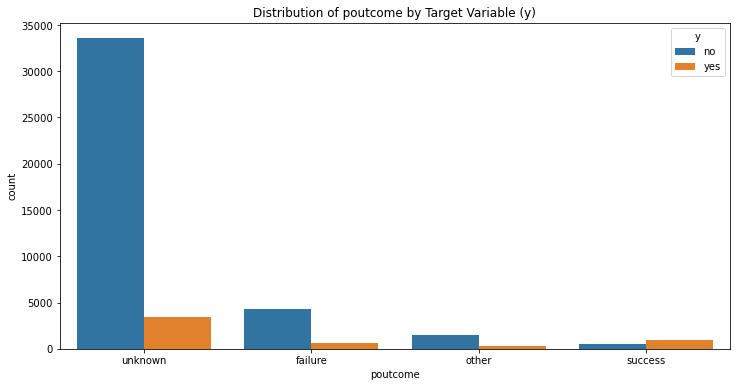

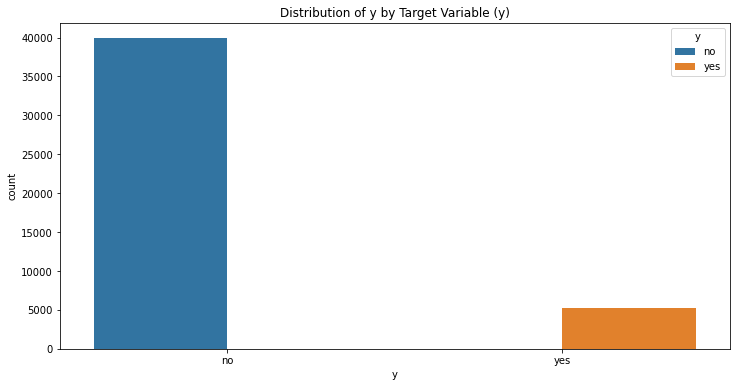

In [14]:
# Visualize categorical features
categorical_features = bank_data.select_dtypes(include=['object']).columns
for feature in categorical_features:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=feature, data=bank_data, hue='y')
    plt.title(f'Distribution of {feature} by Target Variable (y)')
    plt.show()

In [15]:
# Identify Outliers
def identify_outliers(data, threshold=2, return_indices=False, return_z_scores=False):
    mean = np.mean(data)
    std = np.std(data)

    z_scores = [(value - mean) / std for value in data]
    outliers = [value for value, z_score in zip(data, z_scores) if np.abs(z_score) > threshold]

    result = {'outliers': outliers}

    if return_indices:
        outlier_indices = [i for i, z_score in enumerate(z_scores) if np.abs(z_score) > threshold]
        result['outlier_indices'] = outlier_indices

    if return_z_scores:
        result['z_scores'] = z_scores

    return result


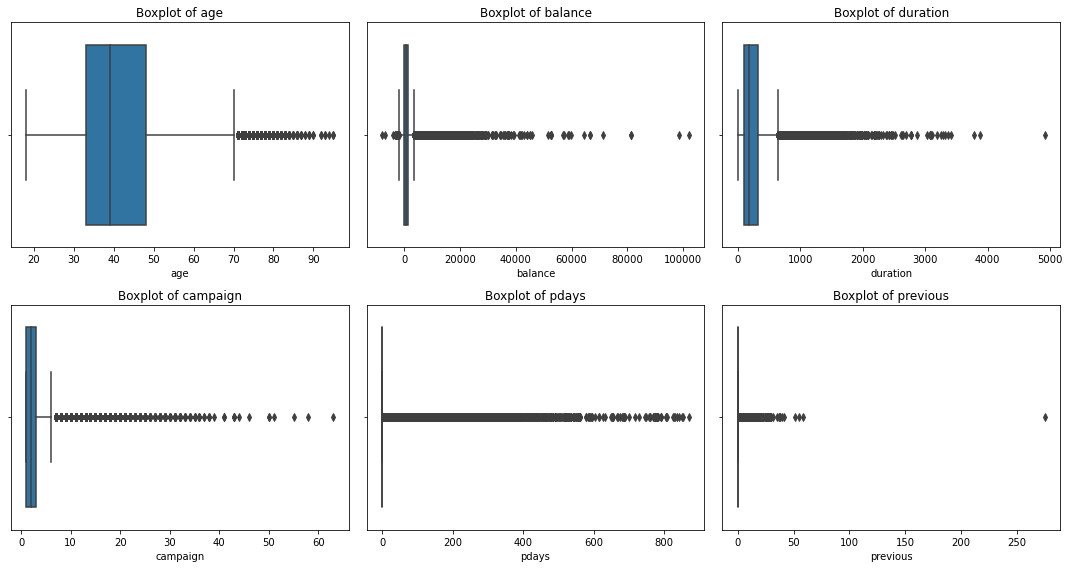

In [16]:
# Plot boxplots to visualize outliers
columns_of_interest = ['age', 'balance','duration', 'campaign', 'pdays','previous']
plt.figure(figsize=(15, 8))
for i, column in enumerate(columns_of_interest, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=bank_data[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

* The box plots above  

* From the above correlation matrix, we can summarize the following;
- 

### Bivariate Analysis 


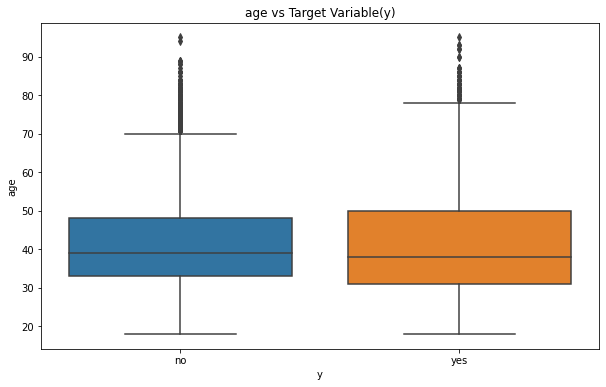

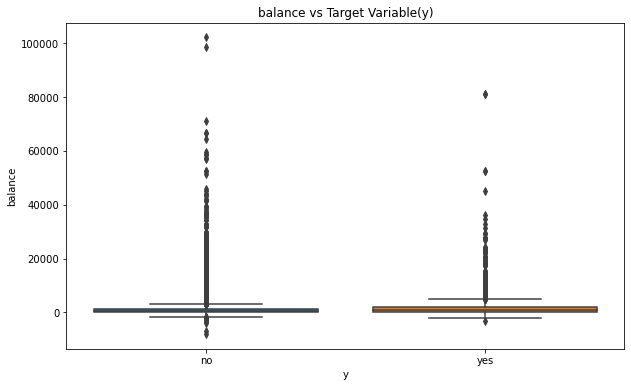

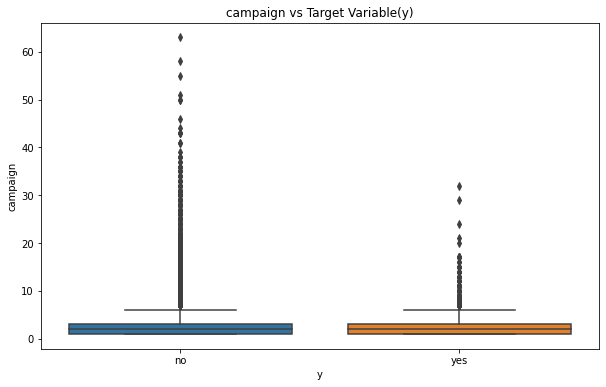

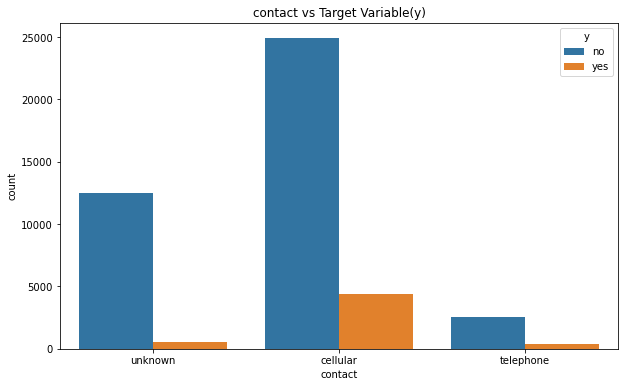

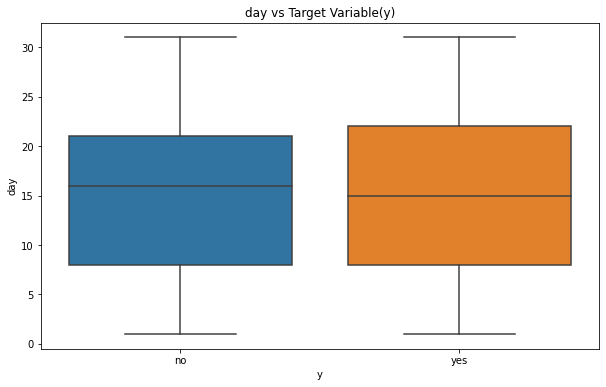

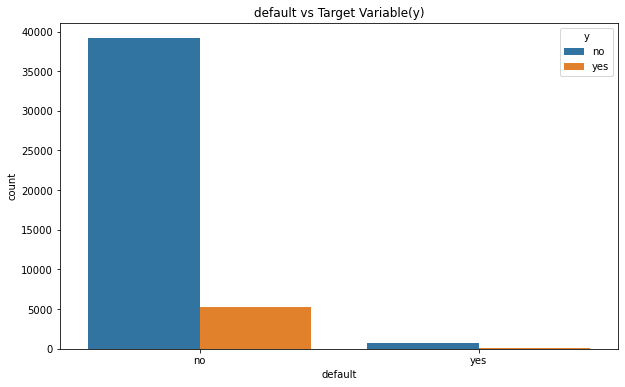

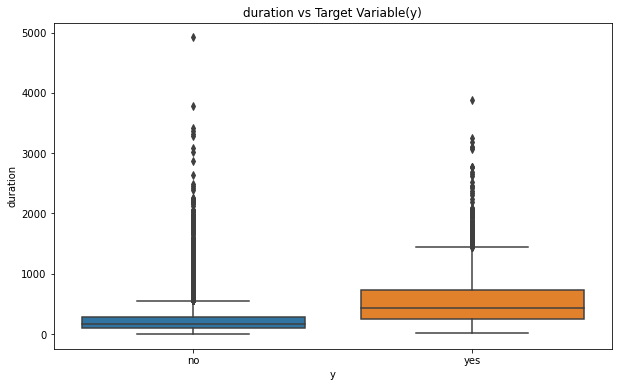

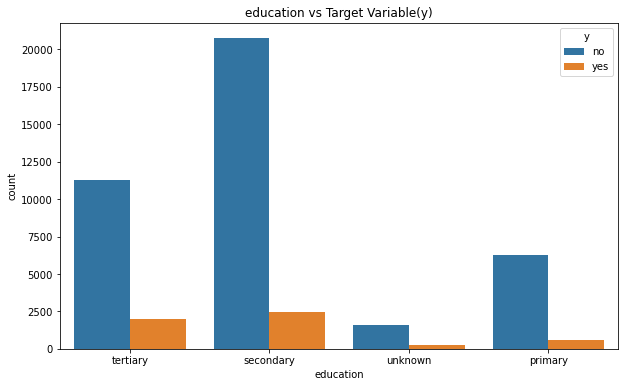

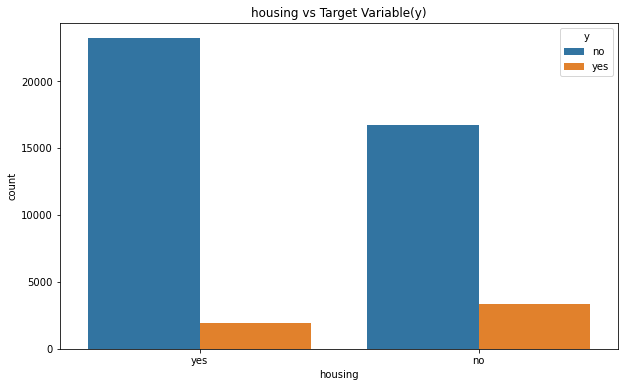

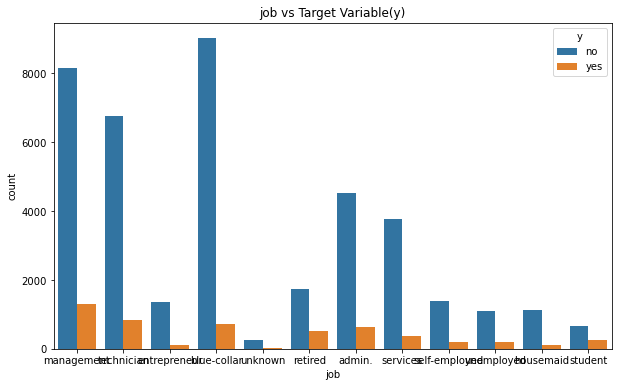

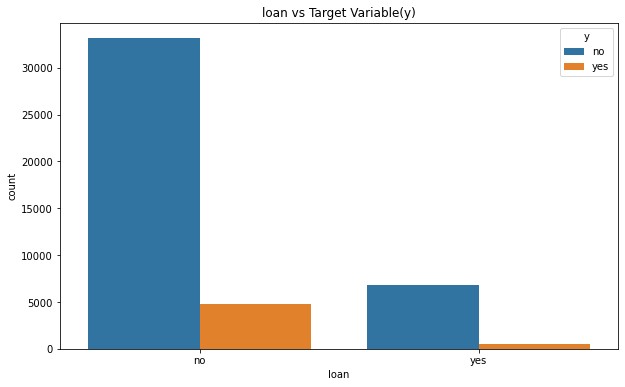

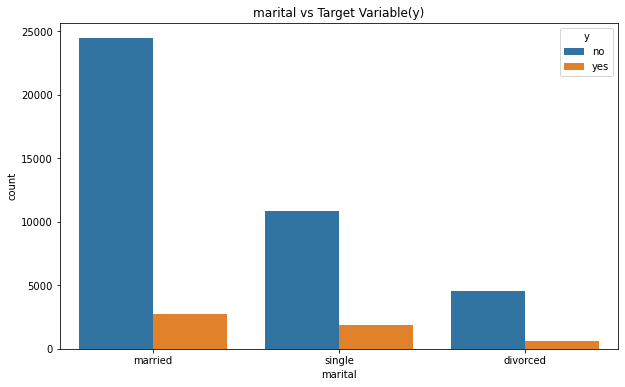

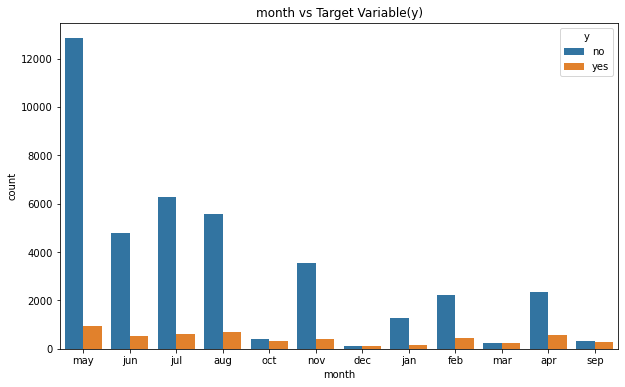

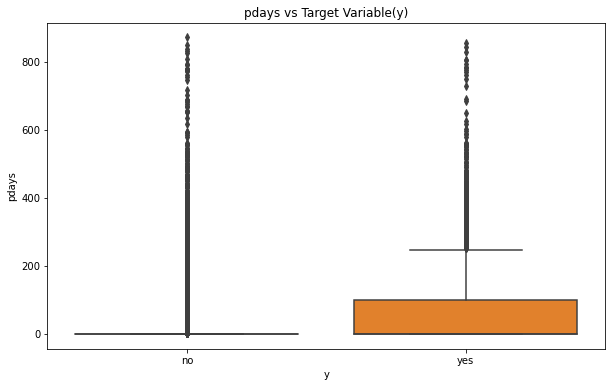

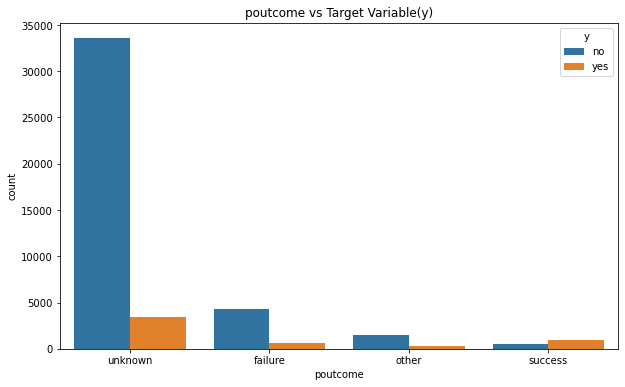

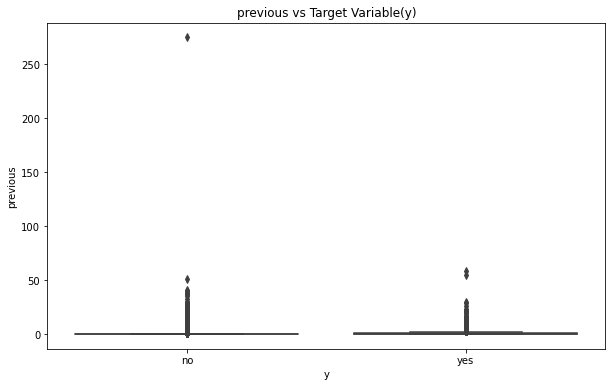

In [17]:
# Relationship with the target variables 
for column in bank_data.columns.difference(['y']):
    if bank_data[column].dtype =='object':
        plt.figure(figsize=(10,6))
        sns.countplot(x=column, hue='y', data = bank_data)
        plt.title(f'{column} vs Target Variable(y)')
        plt.show()
    else:
        plt.figure(figsize=(10,6))
        sns.boxplot(x='y',y=column, data = bank_data)
        plt.title(f'{column} vs Target Variable(y)')
        plt.show()    

* From the above plots we can conclude that:
* The plots above in this case to show relationships between target variable.
* 
- 

### One Hot Encoding 

In [18]:
# One-hot encode categorical variables
bank_data_encoded = pd.get_dummies(bank_data)

In [19]:
# One-Hot Encoding for Categorical Variables
bank_data = pd.get_dummies(bank_data, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'])


#### Create Binary features 

In [20]:
# # Creating Binary Features
# binary_columns = ['default', 'housing', 'loan']
# bank_data[binary_columns] = bank_data[binary_columns].apply(lambda x: x.map({'no': 0, 'yes': 1}))


#### Create Bins for the age column 

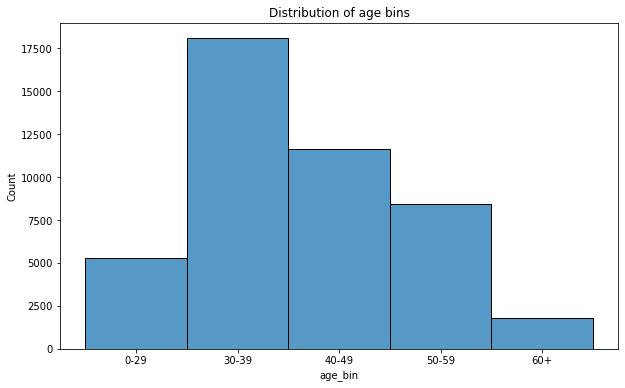

In [21]:
# Create bins for the numerical variable 
bins = [0,30,40,50,60,100]
# Define and create labels
labels=['0-29','30-39','40-49','50-59','60+']
bank_data['age_bin'] = pd.cut(bank_data['age'],bins = bins,labels=labels,right= False)
# Visualize
plt.figure(figsize=(10,6))
sns.histplot(bank_data['age_bin'], kde = False)
plt.title('Distribution of age bins')
plt.ylabel('Count')
plt.show()



In [22]:
bank_data

age  balance  day  duration  campaign  pdays  previous    y  \
0       58     2143    5       261         1     -1         0   no   
1       44       29    5       151         1     -1         0   no   
2       33        2    5        76         1     -1         0   no   
3       47     1506    5        92         1     -1         0   no   
4       33        1    5       198         1     -1         0   no   
...    ...      ...  ...       ...       ...    ...       ...  ...   
45206   51      825   17       977         3     -1         0  yes   
45207   71     1729   17       456         2     -1         0  yes   
45208   72     5715   17      1127         5    184         3  yes   
45209   57      668   17       508         4     -1         0   no   
45210   37     2971   17       361         2    188        11   no   

       job_admin.  job_blue-collar  ...  month_mar  month_may  month_nov  \
0           False            False  ...      False       True      False   
1           False            False  ...      False       True      False   
2           False            False  ...      False       True      False   
3           False             True  ...      False       True      False   
4           False            False  ...      False       True      False   
...           ...              ...  ...        ...        ...        ...   
45206       False            False  ...      False      False       True   
45207       False            False  ...      False      False       True   
45208       False            False  ...      False      False       True   
45209       False             True  ...      False      False       True   
45210       False            False  ...      False      False       True   

       month_oct  month_sep  poutcome_failure  poutcome_other  \
0          False      False             False           False   
1          False      False             False           False   
2          False      False             False           False   
3          False      False             False           False   
4          False      False             False           False   
...          ...        ...               ...             ...   
45206      False      False             False           False   
45207      False      False             False           False   
45208      False      False             False           False   
45209      False      False             False           False   
45210      False      False             False            True   

       poutcome_success  poutcome_unknown  age_bin  
0                 False              True    50-59  
1                 False              True    40-49  
2                 False              True    30-39  
3                 False              True    40-49  
4                 False              True    30-39  
...                 ...               ...      ...  
45206             False              True    50-59  
45207             False              True      60+  
45208              True             False      60+  
45209             False              True    50-59  
45210             False             False    30-39  

[45211 rows x 53 columns]

## Correlation Matrix

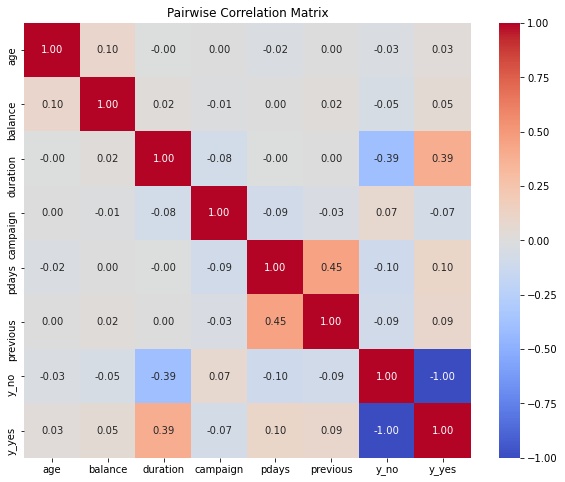

In [23]:
# Select relevant columns
selected_columns = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'y']

# Ensure selected columns are numeric or one-hot encode categorical columns
selected_data = pd.get_dummies(bank_data[selected_columns])

# Calculate correlation matrix
correlation_matrix = selected_data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Pairwise Correlation Matrix')
plt.show()


In [24]:
# Drop rows with missing values in any column
bank_data.dropna(inplace=True)

# Display the modified DataFrame
bank_data


age  balance  day  duration  campaign  pdays  previous    y  \
0       58     2143    5       261         1     -1         0   no   
1       44       29    5       151         1     -1         0   no   
2       33        2    5        76         1     -1         0   no   
3       47     1506    5        92         1     -1         0   no   
4       33        1    5       198         1     -1         0   no   
...    ...      ...  ...       ...       ...    ...       ...  ...   
45206   51      825   17       977         3     -1         0  yes   
45207   71     1729   17       456         2     -1         0  yes   
45208   72     5715   17      1127         5    184         3  yes   
45209   57      668   17       508         4     -1         0   no   
45210   37     2971   17       361         2    188        11   no   

       job_admin.  job_blue-collar  ...  month_mar  month_may  month_nov  \
0           False            False  ...      False       True      False   
1           False            False  ...      False       True      False   
2           False            False  ...      False       True      False   
3           False             True  ...      False       True      False   
4           False            False  ...      False       True      False   
...           ...              ...  ...        ...        ...        ...   
45206       False            False  ...      False      False       True   
45207       False            False  ...      False      False       True   
45208       False            False  ...      False      False       True   
45209       False             True  ...      False      False       True   
45210       False            False  ...      False      False       True   

       month_oct  month_sep  poutcome_failure  poutcome_other  \
0          False      False             False           False   
1          False      False             False           False   
2          False      False             False           False   
3          False      False             False           False   
4          False      False             False           False   
...          ...        ...               ...             ...   
45206      False      False             False           False   
45207      False      False             False           False   
45208      False      False             False           False   
45209      False      False             False           False   
45210      False      False             False            True   

       poutcome_success  poutcome_unknown  age_bin  
0                 False              True    50-59  
1                 False              True    40-49  
2                 False              True    30-39  
3                 False              True    40-49  
4                 False              True    30-39  
...                 ...               ...      ...  
45206             False              True    50-59  
45207             False              True      60+  
45208              True             False      60+  
45209             False              True    50-59  
45210             False             False    30-39  

[45211 rows x 53 columns]

In [31]:
# Drop rows with missing values in the 'days_since_last_contact' column
bank_data.dropna(subset=['days_since_last_contact'], inplace=True)


In [25]:
# Check the column names in the DataFrame
print(bank_data.columns)

# Or print the entire DataFrame
print(bank_data)


Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'age_bin'],
      dtype='object')
       age  balance  day  duration  campaign  pdays  previous    y  \
0    

In [32]:


# 2. Balance Category Feature
bank_data['balance_category'] = pd.cut(bank_data['balance'], bins=[-np.inf, 0, 1000, 5000, np.inf], labels=['negative', 'low', 'medium', 'high'])

    # 3. Duration Category Feature
bank_data['duration_category'] = pd.cut(bank_data['duration'], bins=[0, 100, 300, 600, np.inf], labels=['short', 'medium', 'long', 'very_long'])

    # 4. Previous Interaction Flag
bank_data['previous_interaction'] = (bank_data['previous'] > 0).astype(int)

    # 5. Campaign Success Rate
bank_data['campaign_success_rate'] = bank_data['previous'] / bank_data['campaign'].replace({0: 1})  # Avoid division by zero

    # 7. Days Since Last Contact
bank_data['days_since_last_contact'] = np.where(bank_data['pdays'] == -1, np.nan, bank_data['pdays'])

    # Display the modified DataFrame
bank_data

age  balance  day  duration  campaign  pdays  previous    y  \
24060   33      882   21        39         1    151         3   no   
24062   42     -247   21       519         1    166         1  yes   
24064   33     3444   21       144         1     91         4  yes   
24072   36     2415   22        73         1     86         4   no   
24077   36        0   23       140         1    143         3  yes   
...    ...      ...  ...       ...       ...    ...       ...  ...   
45199   34     1475   16      1166         3    530        12   no   
45201   53      583   17       226         1    184         4  yes   
45204   73     2850   17       300         1     40         8  yes   
45208   72     5715   17      1127         5    184         3  yes   
45210   37     2971   17       361         2    188        11   no   

       job_admin.  job_blue-collar  ...  poutcome_failure  poutcome_other  \
24060        True            False  ...              True           False   
24062        True            False  ...             False            True   
24064       False            False  ...              True           False   
24072       False            False  ...             False            True   
24077       False            False  ...              True           False   
...           ...              ...  ...               ...             ...   
45199       False             True  ...             False            True   
45201       False            False  ...             False           False   
45204       False            False  ...              True           False   
45208       False            False  ...             False           False   
45210       False            False  ...             False            True   

       poutcome_success  poutcome_unknown  age_bin  balance_category  \
24060             False             False    30-39               low   
24062             False             False    40-49          negative   
24064             False             False    30-39            medium   
24072             False             False    30-39            medium   
24077             False             False    30-39          negative   
...                 ...               ...      ...               ...   
45199             False             False    30-39            medium   
45201              True             False    50-59               low   
45204             False             False      60+            medium   
45208              True             False      60+              high   
45210             False             False    30-39            medium   

       duration_category  previous_interaction  campaign_success_rate  \
24060              short                     1                    3.0   
24062               long                     1                    1.0   
24064             medium                     1                    4.0   
24072              short                     1                    4.0   
24077             medium                     1                    3.0   
...                  ...                   ...                    ...   
45199          very_long                     1                    4.0   
45201             medium                     1                    4.0   
45204             medium                     1                    8.0   
45208          very_long                     1                    0.6   
45210               long                     1                    5.5   

       days_since_last_contact  
24060                    151.0  
24062                    166.0  
24064                     91.0  
24072                     86.0  
24077                    143.0  
...                        ...  
45199                    530.0  
45201                    184.0  
45204                     40.0  
45208                    184.0  
45210                    188.0  

[8257 rows x 58 columns]